## predicting heart disease using ml

we are to going to take foloeing approach 
1. definition
2. data
3. evalution
4 . features 
5 . modelling 
6 . experimentation

1. ## statement
   given certain parameters we have  to predict whether paitient has heart disease or not
   ## data
   the original data is from cleavland data from UCI ml repository
   ## evalution
   if accuracy comes greater than 95% we can prusue the model
   ## features
   all those sets on which data will be evaluated
   

## preparing the tools
goind to use pandas, matplotlib, numpy for dta analysis

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
##models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

##model evalution

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score,f1_score




In [7]:
## load the data
df = pd.read_csv("45 - heart-disease.csv")
df
#df.shape(for totals rows and columns)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
## explore the data to do better(exploratoratory data analusis or EDA)
1 . what question we are trying to solve
2 . what kind of data we have and how do we treat diff. types
3 . whats is missing in our data and how to deal with it
4. where are outliers and why should we care aboiut them
5 . how can we add , change or remove features



In [8]:
##lets see how may class target column has
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

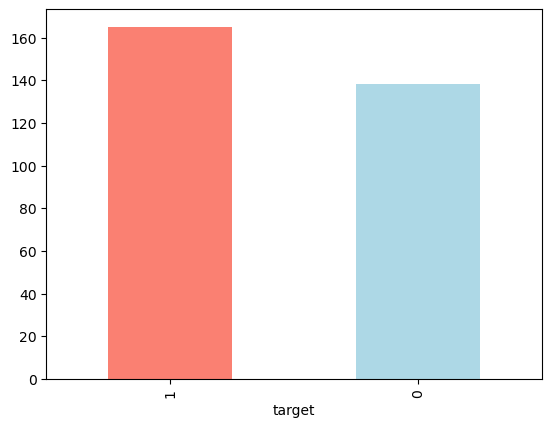

In [10]:
df["target"].value_counts().plot(kind= "bar" , color = ["salmon" , "Lightblue"]);
plt.show()

In [11]:
##diff. info about dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
## missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## heart disease frequenc acc. to sex


In [14]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [15]:
## compare target column with sex coumn
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


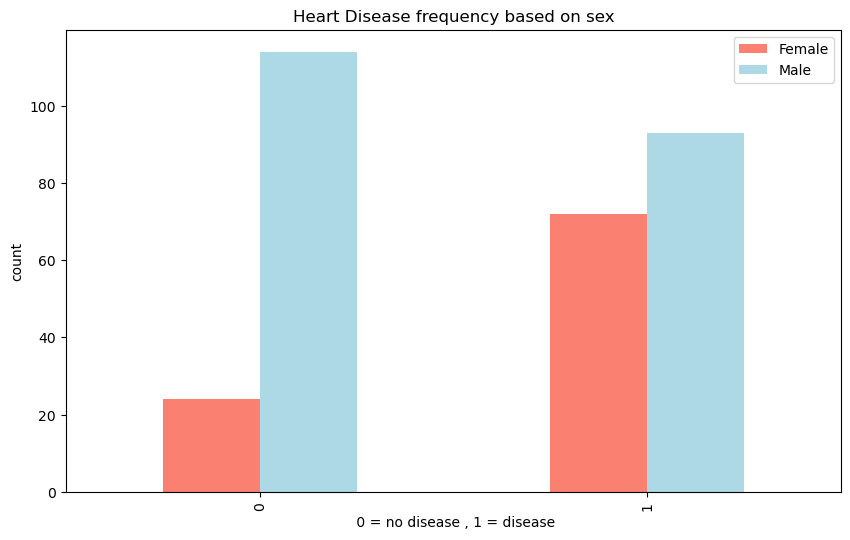

In [17]:
pd.crosstab(df.target,df.sex).plot(kind = "bar" , figsize = (10,6) , color = ["salmon" , "Lightblue"])

plt.title("Heart Disease frequency based on sex")
plt.xlabel(" 0 = no disease , 1 = disease")
plt.ylabel("count")
plt.legend(["Female" , "Male"])
plt.show()

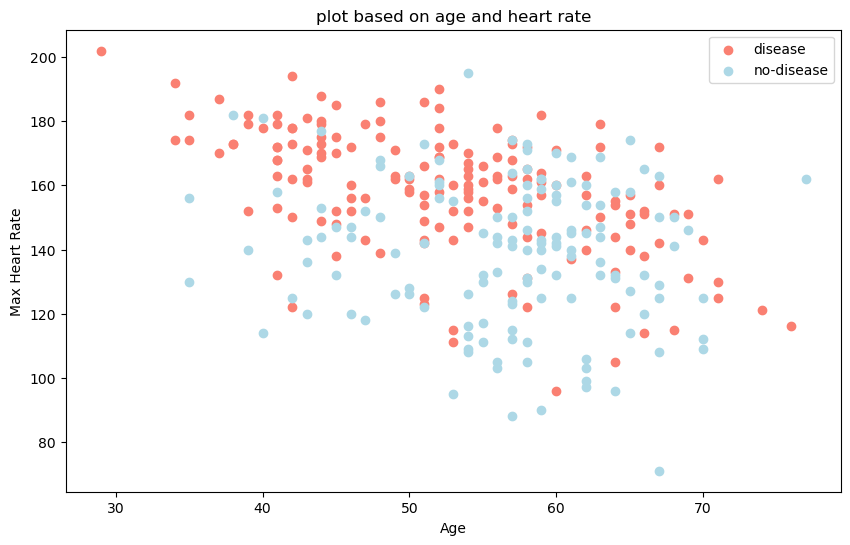

In [20]:
## age vs heart-rate(thalach)
plt.figure(figsize = (10,6))

## sacattered data with target 1
plt.scatter(df.age[df.target==1] , df.thalach[df.target==1],color = "salmon")

plt.scatter(df.age[df.target==0] , df.thalach[df.target==0],color = "lightblue")


plt.title("plot based on age and heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["disease" , "no-disease"])
plt.show()

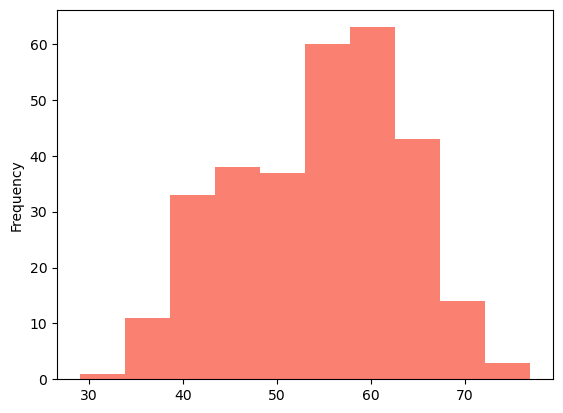

In [24]:
## see distribution of age coumn with hostogram
df.age.plot(kind = "hist", color = "salmon");
plt.show()
## below is kind of normal distribution

In [25]:
## chest pain vs target

pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


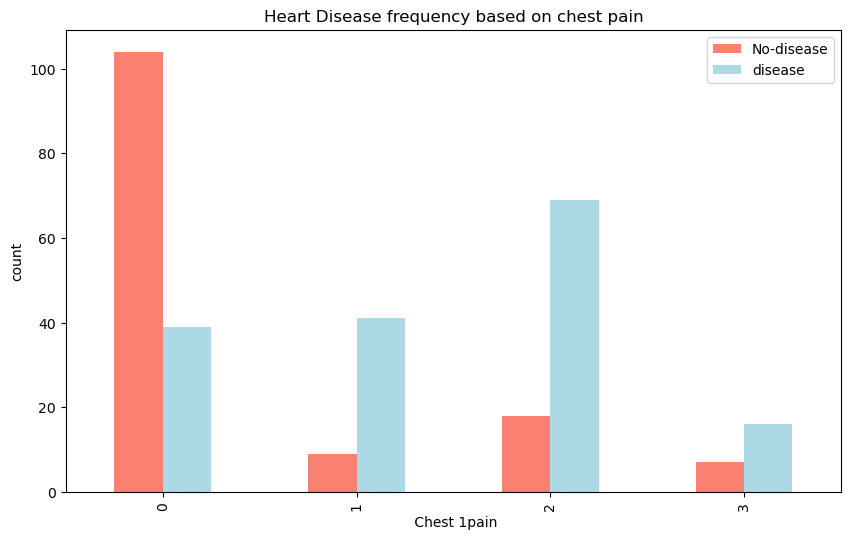

In [26]:
pd.crosstab(df.cp,df.target).plot(kind = "bar" , figsize = (10,6) , color = ["salmon" , "Lightblue"])
plt.title("Heart Disease frequency based on chest pain")
plt.xlabel(" Chest 1pain")
plt.ylabel("count")
plt.legend(["No-disease" , "disease"])
plt.show()

In [27]:
## correlation matrix
## on a Pandas DataFrame, it calculates the correlation matrix 
## a table that shows how strongly each pair of numeric features are related.


df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Figure size 640x480 with 0 Axes>

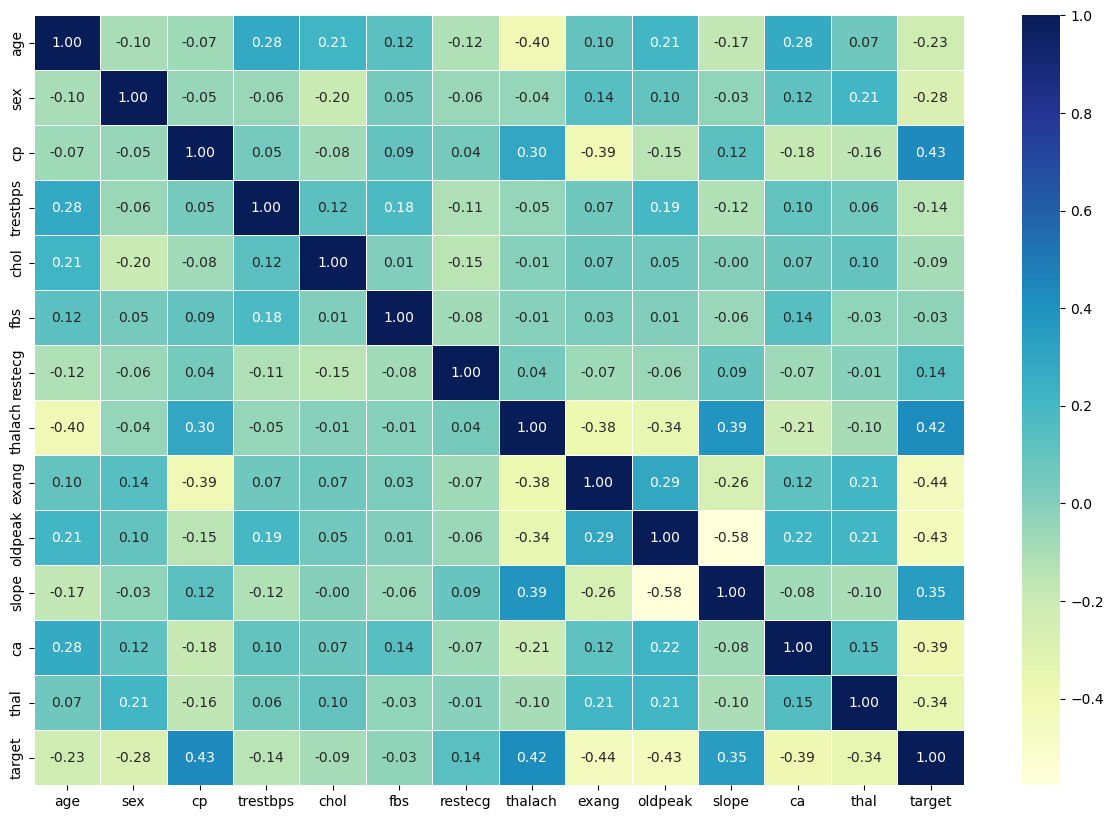

In [31]:
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot = True , linewidths = 0.5, 
                fmt = ".2f" , cmap = "YlGnBu");
plt.show()

## negative coorelation means inverse relationship and vice - versa

## Modelling

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
x = df.drop("target" , axis = 1)
y = df["target"]


In [34]:
## split the data
np.random.seed(42)
x_train , x_test , y_train, y_test =  train_test_split(x , y , test_size = 0.2)


In [37]:
## lets use model
## first train and then test
## try 3 diff . models

## put model in dictionary 

models = { "Logistic regression" : LogisticRegression() , "KNN" : KNeighborsClassifier() , "random forest": RandomForestClassifier()}

## cfeate a function to fit and score model

def fit_and_score(models,x_train,x_test,y_train,y_test):
     np.random.seed(42)
     ##dict to keep score
     model_scores={}
     for name, model in models.items():
         model.fit(x_train,y_train)
         model_scores[name] = model.score(x_test,y_test)

     return model_scores
     


In [38]:
model_scores  = fit_and_score(models= models,x_train = x_train,x_test=x_test,y_train = y_train,y_test=y_test)

model_scores

C:\Users\megha sharma\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'random forest': 0.8360655737704918}

## model comparision


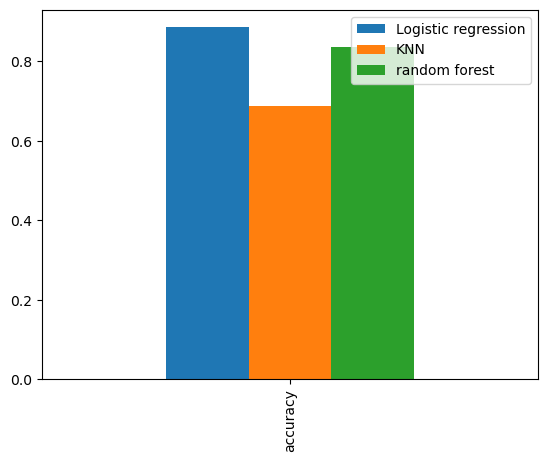

In [43]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.plot.bar()
plt.show()

##lets enhance accuracy 
##let us use hyperparametrs tuning
## hperparameter tuning


In [47]:
train_scores= []
test_scores = []

## creating a ranhe of n_neighbours
neighbors = range(1,21)

knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(x_train,y_train)

    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test, y_test))


In [48]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [49]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

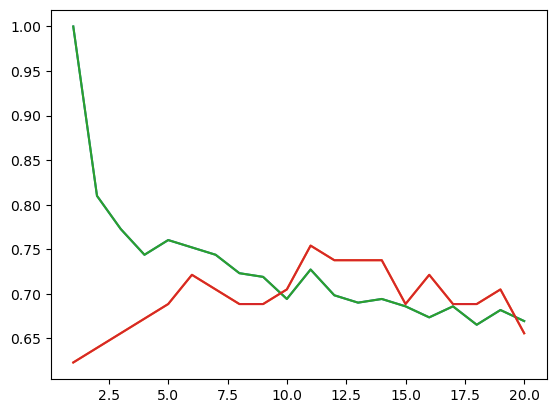

In [51]:
plt.plot(neighbors, train_scores , label = "train-scores")
plt.plot(neighbors , test_scores, label = "test-scores")
plt.show()

In [52]:
max(test_scores)*100

75.40983606557377

## though we improved but have not recahed our desired accuracy
## tuning using randomizedseachCV

In [59]:
## create a hyperpara,eter grid
log_grid = {"C": np.logspace(-4,4,20), "solver" : ["liblinear"]}
##C is the inverse of regularization strength in Logistic Regression.
##This generates 20 values between   10 ^-4 to 10^4(on a log scale), such as:

rf_grid= {"n_estimators" : np.arange(10,1000,50),
          "max_depth": [None , 3 , 5 , 10],
          "min_samples_split" : np.arange(2 , 20,2),
          "min_samples_leaf" : np.arange(1 , 20,2)}


In [56]:
## lets tune them
## tune logistic regression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions = log_grid , cv =5 , n_iter = 20 , verbose=True)

## fit he model
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [57]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [58]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [61]:
## tune for randomforestclassifier

np.random.seed(42)
rf_log_reg = RandomizedSearchCV(RandomForestClassifier() ,param_distributions = rf_grid , cv =5 , n_iter = 20 , verbose=True)

## fit he model
rf_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [66]:
## find the best params
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [67]:
rf_log_reg.score(x_test,y_test)

0.8688524590163934

## tuning using GRidsearchCV

In [63]:
log_grid = {"C": np.logspace(-4,4,30), "solver" : ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid = log_grid , cv =5 , verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [64]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [65]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [68]:
y_preds  = gs_log_reg.predict(x_test)

In [69]:
## roc curver plot the true positive rate against the false positive rate
import sklearn
print(sklearn.__version__)


1.6.1


In [70]:
from sklearn.metrics import RocCurveDisplay


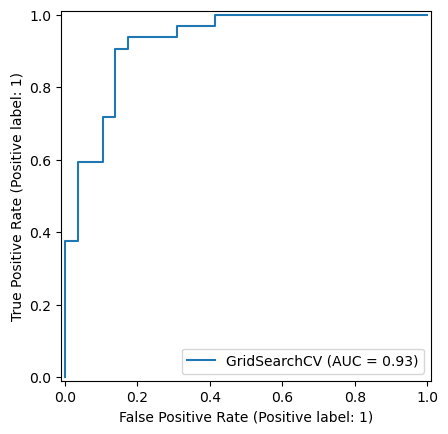

In [74]:
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)
plt.show()


In [76]:
## confusion matrix
print(confusion_matrix(y_test,y_preds))
## What is a confusion matrix?
#3It's a 2×2 table (for binary classification) that compares:

##Actual values (from your data)

##Predicted values (from your model)
                       

[[25  4]
 [ 3 29]]


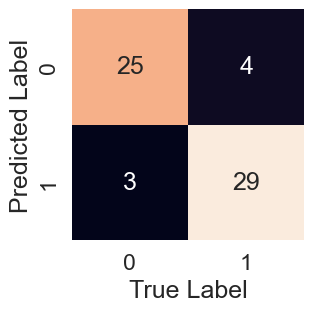

In [77]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test,y_preds):
    fig , ax  = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds) , annot = True , cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test=y_test, y_preds= y_preds)  
plt.show()

In [79]:
## classification report and various scores

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [83]:
## calculate matrix using cross validation
## ceate a new classifire with best parameters
clf = LogisticRegression(C = 0.20433597178569418, solver = "liblinear")


In [85]:
## cross validated accuracy
cv_acc = cross_val_score(clf , x , y , cv=5 , scoring = "accuracy")
cv_acc
np.mean(cv_acc)

np.float64(0.8446994535519124)

In [87]:
cv_pre = cross_val_score(clf , x , y , cv=5 , scoring = "precision")
cv_pre
np.mean(cv_pre)

np.float64(0.8207936507936507)

In [88]:
cv_re = cross_val_score(clf , x , y , cv=5 , scoring = "recall")
cv_re
np.mean(cv_re)

np.float64(0.9212121212121213)

In [89]:
cv_f1 = cross_val_score(clf , x , y , cv=5 , scoring = "f1")
cv_f1
np.mean(cv_f1)

np.float64(0.8673007976269721)

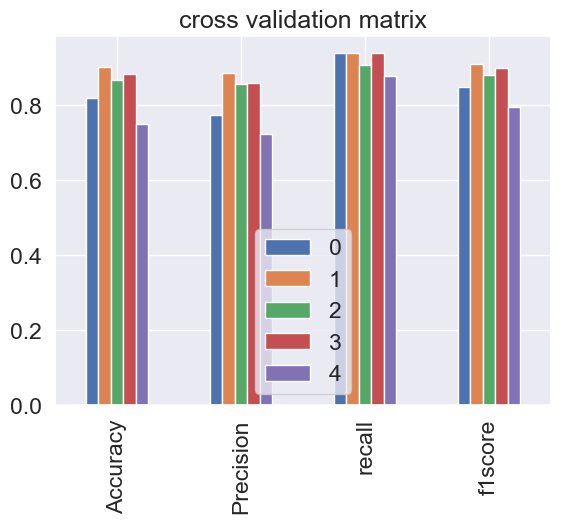

In [92]:
## lets visulalize cross validated matrix
cv_metrics  = pd.DataFrame({"Accuracy" : cv_acc,
                            "Precision" : cv_pre,
                            "recall": cv_re,
                            "f1score" : cv_f1})
cv_metrics.T.plot.bar(title = "cross validation matrix")
plt.show()

## Features Importance

## which features contributed the most and how?
## diff . from each ml model
## how to find features importance using logistic regression


In [93]:
clf = LogisticRegression(C = 0.20433597178569418, solver = "liblinear")
clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [95]:
clf.coef_
##A positive coefficient for cholesterol suggests that higher cholesterol levels increase the likelihood of heart disease.

##A negative coefficient for exercise suggests that more exercise decreases the likelihood of heart disease.



array([[ 0.00316728, -0.86044619,  0.6606706 , -0.01156993, -0.00166374,
         0.04386123,  0.31275813,  0.02459361, -0.60413061, -0.56862832,
         0.45051624, -0.63609879, -0.67663383]])

In [96]:
##match coef to coulms
features_dict = dict(zip(df.columns , list(clf.coef_[0])))
features_dict

{'age': np.float64(0.0031672769574500135),
 'sex': np.float64(-0.8604461876509621),
 'cp': np.float64(0.6606705956911073),
 'trestbps': np.float64(-0.011569931563712749),
 'chol': np.float64(-0.0016637424209784567),
 'fbs': np.float64(0.04386123481544026),
 'restecg': np.float64(0.3127581278171948),
 'thalach': np.float64(0.02459361107844528),
 'exang': np.float64(-0.6041306062020464),
 'oldpeak': np.float64(-0.5686283181245352),
 'slope': np.float64(0.4505162370054866),
 'ca': np.float64(-0.6360987949056705),
 'thal': np.float64(-0.6766338344951353)}

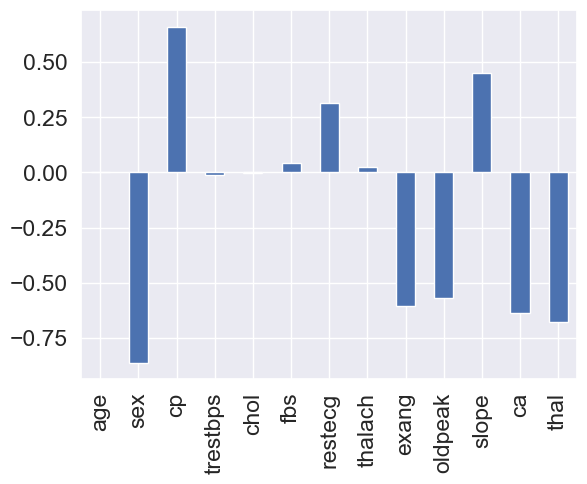

In [100]:
features_df = pd.DataFrame(features_dict , index = [0])
features_df.T.plot.bar(legend = False)
plt.show()